In [82]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [83]:
my_url = "https://en.wikipedia.org/wiki/2019_in_film#Film_debuts"
response = requests.get(my_url)
response.raise_for_status() 
soup = BeautifulSoup(response.text, 'html.parser')

In [84]:
content_div = soup.find('div', {'id': 'mw-content-text'})
if content_div:
    paragraphs = content_div.find_all('p')
    content = ' '.join(p.get_text() for p in paragraphs)
else:
    content = ""
    
words = content.split()
words = [item.replace(",", "") for item in words]

In [85]:
print(Counter(words))

Counter({'the': 27, 'of': 24, 'and': 15, 'to': 8, 'in': 6, 'film': 6, 'movies': 6, '2019': 5, 'films': 5, 'The': 5, 'year': 5, 'highest-grossing': 4, 'a': 4, 'best': 3, 'an': 2, 'including': 2, 'lists': 2, 'festivals': 2, 'released': 2, 'movie': 2, 'Endgame': 2, 'highest': 2, 'top': 2, 'cinema': 2, 'which': 2, 'have': 2, 'with': 2, 'at': 2, 'hand': 2, 'threats': 2, 'from': 2, 'business': 2, 'be': 2, 'are': 2, 'for': 2, 'but': 2, 'that': 2, 'by': 2, 'worldwide': 2, 'gross': 2, 'as': 2, 'became': 2, 'fifth': 2, 'billion': 2, 'all': 2, 'Joker': 2, '$1': 2, 'second': 2, 'first': 2, 'is': 1, 'overview': 1, 'events': 1, 'award': 1, 'ceremonies': 1, "critics'": 1, 'list': 1, 'country-specific': 1, 'programming.': 1, 'Avengers': 1, 'was': 1, "year's": 1, 'grossing': 1, 'all-time': 1, 'until': 1, 'Avatar': 1, 'regained': 1, 'spot': 1, '2021.': 1, 'In': 1, 'his': 1, 'article': 1, 'highlighting': 1, 'Richard': 1, 'Brody': 1, 'New': 1, 'Yorker': 1, 'said': 1, '"It\'s': 1, 'apocalyptic': 1, 'order'

In [86]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

In [87]:
word_counts = Counter(filtered_words)
print(word_counts)

Counter({'film': 6, 'movies': 6, '2019': 5, 'films': 5, 'The': 5, 'year': 5, 'highest-grossing': 4, 'best': 3, 'including': 2, 'lists': 2, 'festivals': 2, 'released': 2, 'movie': 2, 'Endgame': 2, 'highest': 2, 'top': 2, 'cinema': 2, 'hand': 2, 'threats': 2, 'business': 2, 'worldwide': 2, 'gross': 2, 'became': 2, 'fifth': 2, 'billion': 2, 'Joker': 2, '$1': 2, 'second': 2, 'first': 2, 'overview': 1, 'events': 1, 'award': 1, 'ceremonies': 1, "critics'": 1, 'list': 1, 'country-specific': 1, 'programming.': 1, 'Avengers': 1, "year's": 1, 'grossing': 1, 'all-time': 1, 'Avatar': 1, 'regained': 1, 'spot': 1, '2021.': 1, 'In': 1, 'article': 1, 'highlighting': 1, 'Richard': 1, 'Brody': 1, 'New': 1, 'Yorker': 1, 'said': 1, '"It\'s': 1, 'apocalyptic': 1, 'order': 1, 'three': 1, 'filmmakers': 1, 'responded': 1, 'vast': 1, 'ambition': 1, 'invention': 1, 'inspiration': 1, 'crises': 1, 'American': 1, 'democracy': 1, 'catastrophic': 1, 'menaces': 1, 'arising': 1, 'global': 1, 'warming': 1, 'corrosive':

In [88]:
top_words = dict(word_counts.most_common(10))
print(top_words)

{'film': 6, 'movies': 6, '2019': 5, 'films': 5, 'The': 5, 'year': 5, 'highest-grossing': 4, 'best': 3, 'including': 2, 'lists': 2}


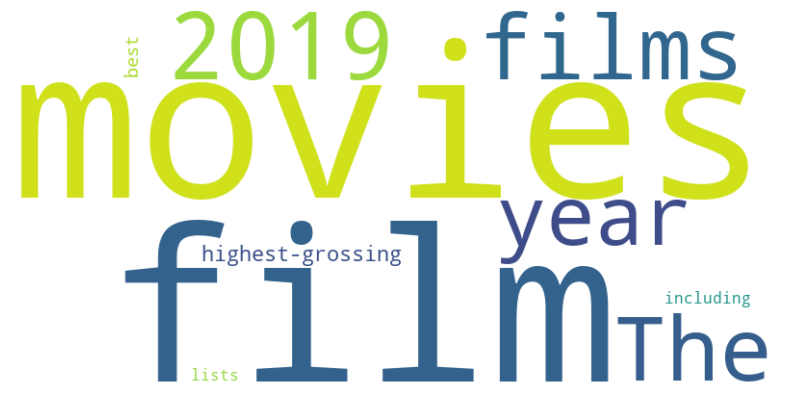

In [89]:
#generating wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [90]:
#Table scraping and analysis
tables = pd.read_html(my_url)
mtable= tables[2]
print(mtable)

   Rank                             Title    Distributor Worldwide gross
0     1                 Avengers: Endgame         Disney  $2,799,439,100
1     2                     The Lion King         Disney  $1,656,943,394
2     3                         Frozen II         Disney  $1,450,026,933
3     4         Spider-Man: Far From Home  Sony Pictures  $1,131,927,996
4     5                    Captain Marvel         Disney  $1,128,274,794
5     6                             Joker   Warner Bros.  $1,078,751,311
6     7  Star Wars: The Rise of Skywalker         Disney  $1,074,144,248
7     8                       Toy Story 4         Disney  $1,073,394,593
8     9                           Aladdin         Disney  $1,050,693,953
9    10           Jumanji: The Next Level  Sony Pictures    $801,693,929


In [91]:
mtable.columns

Index(['Rank', 'Title', 'Distributor', 'Worldwide gross'], dtype='object')

In [92]:
mtable.dtypes

Rank                int64
Title              object
Distributor        object
Worldwide gross    object
dtype: object

In [93]:
mtable['Worldwide gross'] = mtable['Worldwide gross'].map(lambda x: x.lstrip('$'))
mtable.replace(',','', regex=True, inplace=True)

In [94]:
mtable['Worldwide gross'] = pd.to_numeric(mtable['Worldwide gross'])
mtable.dtypes

Rank                int64
Title              object
Distributor        object
Worldwide gross     int64
dtype: object

In [95]:
mtable['Worldwide gross'].sum()

13245290251

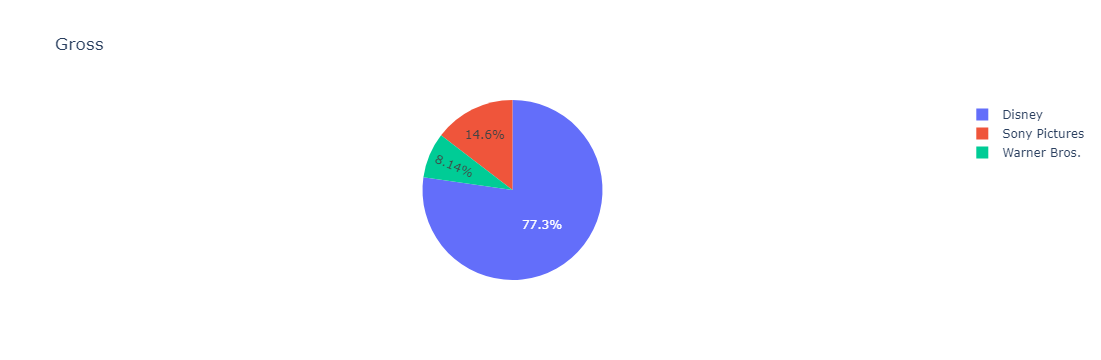

In [96]:
fig_1 = px.pie(mtable, values='Worldwide gross', names='Distributor', title='Gross ')
fig_1.show()

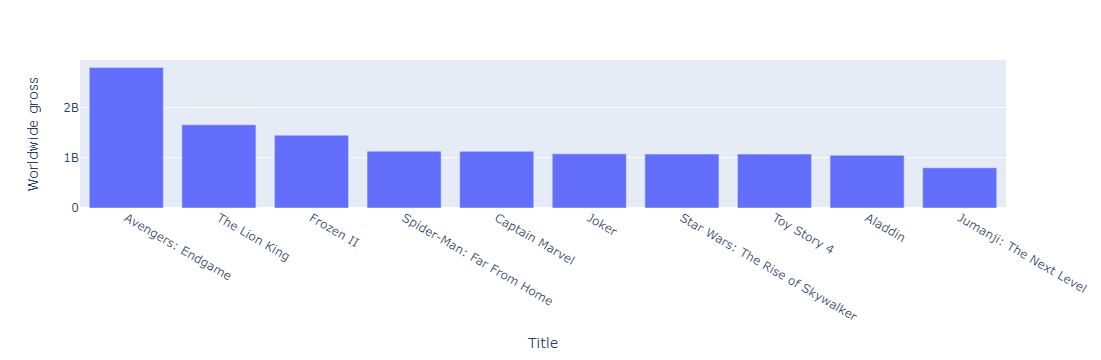

In [97]:
fig_2 = px.bar(mtable, x='Title', y='Worldwide gross')
fig_2.show()

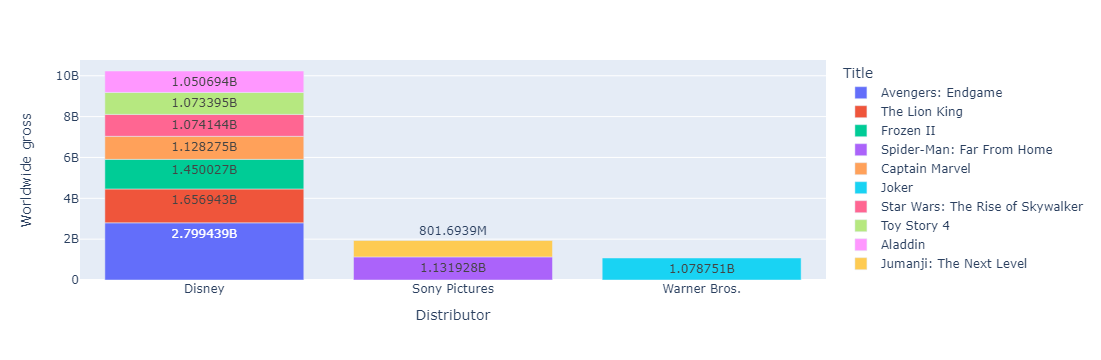

In [98]:
fig_3 = px.bar(mtable, x="Distributor", y="Worldwide gross", color="Title", text_auto=True)
fig_3.show()